# F. Что мы знаем о студентах?

**Вам необходимо ответить на вопросы:**

1. Сколько студентов обучаются в университете?
2. Сколько студентов выпустились из университета?
3. Какое самое популярное направление подготовки среди мужчин , которые обучаются в университете?
4. Какое самое непопулярное направление подготовки среди женщин, которые обучаются в университете?
5. Укажите ID студента, о котором вообще нет сведений.
6. Сколько различных направлений подготовки содержится в наборе данных?
7. Кого больше среди выпускников: мужчин или женщин? (в качестве ответа достаточно вывести М или Ж).

In [31]:
# Монтирует google disk в colab
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


Модуль `os` в Python — это библиотека функций для работы с операционной системой. Методы, включенные в неё позволяют определять тип операционной системы, получать доступ к переменным окружения, управлять директориями и файлами

In [2]:
import os

url = os.chdir(r"/content/gdrive/MyDrive/Я-профи подготовка по машинному обучению/Разбор контеста")
os.getcwd()

'/content/gdrive/MyDrive/Я-профи подготовка по машинному обучению/Разбор контеста'

In [3]:
os.listdir()

['studs_info.csv', 'exams_info.csv', 'output_lala.csv', 'weatherHistory.csv']

In [35]:
import pandas as pd

exams_info = pd.read_csv('exams_info.csv') # инфа об экзаменах
studs_info = pd.read_csv('studs_info.csv') # инфа о студентах

In [36]:
print(exams_info.shape)
print(studs_info.shape)

(105058, 8)
(5466, 11)


In [37]:
exams_info.head()

,STD_ID,НАПРАВЛЕНИЕ,ГОД,КУРС,СЕМЕСТР,АТТЕСТАЦИЯ,ДИСЦИПЛИНА,mark
0,175711,38.03.02 Менеджмент,2018-2019,2.0,4.0,Экзамен,Маркетинг,5
1,100647,31.05.01 Лечебное дело,2015-2016,3.0,5.0,Экзамен,"Пропедевтика внутренних болезней, лучевая диаг...",5
2,199311,31.05.03 Стоматология,2019-2020,1.0,1.0,Экзамен,Химия,5
3,162002,38.03.02 Менеджмент,2017-2018,2.0,3.0,Экзамен,Статистика,4
4,108384,31.05.01 Лечебное дело,2018-2019,5.0,9.0,Экзамен,Педиатрия,3


In [7]:
studs_info.head()

,STD_ID,Пол,Статус,Дата выпуска,Категория обучения,Форма обучения,Шифр,направление (специальность),Образование,Дата выдачи,Что именно закончил
0,99136,Ж,ВЫП,2019-08-31,БП,Д,31.05.01,Лечебное дело,СР,2013-06-26 00:00:00,ИНОГОРОДНЯЯ СРЕДНЯЯ ШКОЛА
1,99112,Ж,ВЫП,2019-08-31,БП,Д,31.05.01,Лечебное дело,СР,2012-06-23 00:00:00,"МОУ СОШ N 2, ПЕСТОВО"
2,99109,Ж,ВЫП,2019-08-31,БП,Д,31.05.01,Лечебное дело,СР,2013-06-25 00:00:00,ИНОГОРОДНЯЯ СРЕДНЯЯ ШКОЛА
3,99125,Ж,ВЫП,2019-08-31,БП,Д,31.05.01,Лечебное дело,СР,2013-06-23 00:00:00,"Гимназия ""ГАРМОНИЯ"""
4,100676,М,ВЫП,2019-08-31,БП,Д,31.05.01,Лечебное дело,СР,2012-06-29 00:00:00,ИНОГОРОДНЯЯ СРЕДНЯЯ ШКОЛА


In [8]:
print(studs_info.shape)
print(len(studs_info['STD_ID'].unique()))

(5466, 11)
5104


In [9]:
studs_info['Статус'].value_counts()

СТ     5001
ВЫП     464
Name: Статус, dtype: int64

In [10]:
tmp = studs_info.loc[studs_info['Статус'] == 'СТ']
tmp['STD_ID'].unique()

array([117204, 117178, 114386, ..., 191630, 191625, 194978])

In [11]:
# 1. Сколько студентов обучаются в университете?
print(len(studs_info.loc[(studs_info['Статус'] == 'СТ')]['STD_ID'].unique()))

4648


In [12]:
# 2. Сколько студентов выпустились из университета?
print(len(studs_info.loc[(studs_info['Статус'] == 'ВЫП')]['STD_ID'].unique()))

455


In [13]:
# 3. Какое самое популярное направление подготовки среди мужчин , которые обучаются в университете?
print(studs_info.loc[(studs_info['Статус'] == 'СТ') & (studs_info['Пол'] == 'М')]['направление (специальность)'].value_counts().idxmax())

Лечебное дело


In [46]:
tmp = studs_info.loc[(studs_info['Статус'] == 'СТ') & (studs_info['Пол'] == 'М')]

In [54]:
tmp['направление (специальность)'].value_counts().idxmin()

'Специальное (дефектологическое) образование'

In [14]:
# 4. Какое самое популярное направление подготовки среди женщин , которые обучаются в университете?
tmp = studs_info.loc[(studs_info['Статус'] == 'СТ') & (studs_info['Пол'] == 'Ж')]

tmp['направление (специальность)'].value_counts().idxmax()

'Лечебное дело'

In [58]:
studs_info.loc[studs_info['Пол'].isna()]

,STD_ID,Пол,Статус,Дата выпуска,Категория обучения,Форма обучения,Шифр,направление (специальность),Образование,Дата выдачи,Что именно закончил
3182,92222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# 5. Укажите ID студента, о котором вообще нет сведений
print(studs_info.loc[studs_info['Пол'].isna()]['STD_ID'].values[0])

92222


In [17]:
studs_info['направление (специальность)'].unique()

array(['Лечебное дело', 'Фундаментальная и прикладная химия',
       'Стоматология', 'Фармация', 'Экономика', 'Менеджмент',
       'Информатика и вычислительная техника',
       'Конструкторско-технологическое обеспечение машиностроительных производств',
       'Лингвистика', 'Управление персоналом', 'Агрономия', 'Биология',
       'Лесное дело', 'Радиотехника', 'Зоотехния', 'Строительство',
       'Экология и природопользование', 'Агроинженерия', 'Журналистика',
       'Землеустройство и кадастры',
       'Государственное и муниципальное управление', 'Юриспруденция',
       'Теплоэнергетика и теплотехника', 'Электроника и наноэлектроника',
       'Филология', 'Конструирование и технология электронных средств',
       'Прикладная математика и информатика', 'Дизайн',
       'Технология художественной обработки материалов',
       'Мехатроника и робототехника',
       'Педагогическое образование (с двумя профилями подготовки)',
       'Архитектура', 'Дизайн архитектурной среды',
       '

In [18]:
# 6. Сколько различных напарвлений подготовки содержится в наборе данных?
print(len(studs_info['направление (специальность)'].unique())-1)

44


In [61]:
tmp = studs_info.loc[(studs_info['Статус'] == 'ВЫП')]

tmp['Пол'].value_counts().idxmax()

'Ж'

In [19]:
# 7. Кого больше среди выпускников: мужчин или женщин?
print(studs_info.loc[(studs_info['Статус'] == 'ВЫП')]['Пол'].value_counts().idxmax())

Ж


# G. Средний балл за экзамены

В качестве ответа выведете:

- в первой строке количество экзаменов для студента с ID=99125
- во второй строке средний балл по всем экзаменам для этого студента (округлите до двух знаков после запятой по правилам математики)

In [65]:
tmp = exams_info.loc[(exams_info['STD_ID'] == 99125) & (exams_info['АТТЕСТАЦИЯ'] == 'Экзамен')]

tmp['mark'].mean().round(2)

4.43

In [66]:
tmp.shape[0]

30

In [20]:
student = exams_info.loc[(exams_info['STD_ID'] == 99125) & (exams_info['АТТЕСТАЦИЯ'] == 'Экзамен')]
print(student.shape[0])
print(student['mark'].mean().round(2))

30
4.43


# H. Изменение средней оценки по предмету

В качестве ответа вам необходимо сформировать output.csv (т.е. DataFrame) со следующими полями:

- ГОД
- ДИСЦИПЛИНА
- mark

Где, ДИСЦИПЛИНА = "Компьютерные технологии в дизайне", mark - это средняя оценка по данному предмету в зависимости от учебного года.

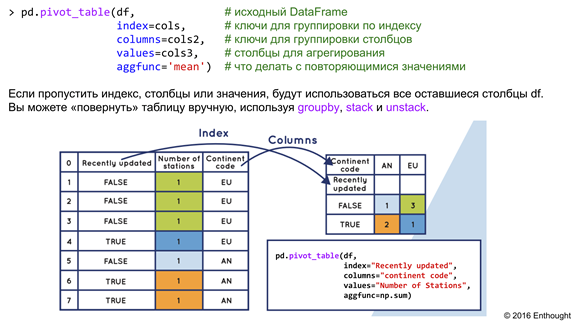

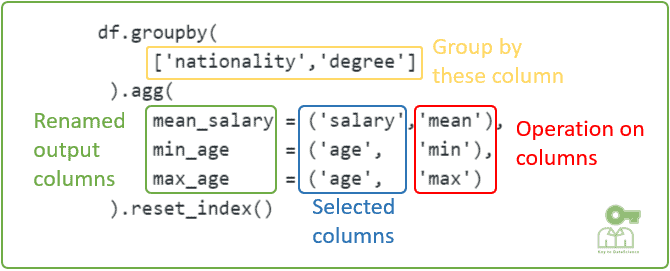

In [68]:
tmp = exams_info.loc[exams_info['ДИСЦИПЛИНА'] == 'Компьютерные технологии в дизайне']
tmp

,STD_ID,НАПРАВЛЕНИЕ,ГОД,КУРС,СЕМЕСТР,АТТЕСТАЦИЯ,ДИСЦИПЛИНА,mark
3234,162163,54.03.01 Дизайн,2017-2018,2.0,4.0,Экзамен,Компьютерные технологии в дизайне,5
6914,170142,54.03.01 Дизайн,2018-2019,3.0,5.0,Экзамен,Компьютерные технологии в дизайне,4
11901,161026,54.03.01 Дизайн,2017-2018,2.0,4.0,Экзамен,Компьютерные технологии в дизайне,5
19573,141948,54.03.01 Дизайн,2016-2017,2.0,4.0,Экзамен,Компьютерные технологии в дизайне,5
21908,88731,54.03.01 Дизайн,2018-2019,3.0,5.0,Экзамен,Компьютерные технологии в дизайне,4
33725,175918,54.03.01 Дизайн,2019-2020,3.0,5.0,Экзамен,Компьютерные технологии в дизайне,5
34634,175919,54.03.01 Дизайн,2018-2019,2.0,4.0,Экзамен,Компьютерные технологии в дизайне,5
35806,142765,54.03.01 Дизайн,2016-2017,2.0,4.0,Экзамен,Компьютерные технологии в дизайне,4
35831,162983,54.03.01 Дизайн,2017-2018,2.0,4.0,Экзамен,Компьютерные технологии в дизайне,5
36845,170141,54.03.01 Дизайн,2018-2019,3.0,5.0,Экзамен,Компьютерные технологии в дизайне,4


In [72]:
t = tmp.groupby(['ГОД', 'ДИСЦИПЛИНА']).agg({'mark':'mean'})
t

,,mark
ГОД,ДИСЦИПЛИНА,
2016-2017,Компьютерные технологии в дизайне,4.500000
2017-2018,Компьютерные технологии в дизайне,4.900000
2018-2019,Компьютерные технологии в дизайне,4.571429
2019-2020,Компьютерные технологии в дизайне,5.000000


In [77]:
t = t.reset_index()

In [78]:
t

,ГОД,ДИСЦИПЛИНА,mark
0,2016-2017,Компьютерные технологии в дизайне,4.500000
1,2017-2018,Компьютерные технологии в дизайне,4.900000
2,2018-2019,Компьютерные технологии в дизайне,4.571429
3,2019-2020,Компьютерные технологии в дизайне,5.000000


In [21]:
tmp = exams_info.pivot_table(index=['ГОД', 'ДИСЦИПЛИНА'], values='mark', aggfunc='mean').reset_index()

tmp = tmp.loc[tmp['ДИСЦИПЛИНА'] == 'Компьютерные технологии в дизайне']
# tmp.to_csv('output.csv', index=False)
tmp

,ГОД,ДИСЦИПЛИНА,mark
460,2016-2017,Компьютерные технологии в дизайне,4.500000
1030,2017-2018,Компьютерные технологии в дизайне,4.900000
1942,2018-2019,Компьютерные технологии в дизайне,4.571429
2984,2019-2020,Компьютерные технологии в дизайне,5.000000


In [22]:
tmp = exams_info.loc[exams_info['ДИСЦИПЛИНА'] == 'Компьютерные технологии в дизайне']
tmp.groupby(['ГОД', 'ДИСЦИПЛИНА']).agg({'mark': 'mean'})

,,mark
ГОД,ДИСЦИПЛИНА,
2016-2017,Компьютерные технологии в дизайне,4.500000
2017-2018,Компьютерные технологии в дизайне,4.900000
2018-2019,Компьютерные технологии в дизайне,4.571429
2019-2020,Компьютерные технологии в дизайне,5.000000


# I. Как учились выпускники?

В качестве ответа сформируйте DataFrame и сохраните его в .csv, в котором будут две колонки:

- STD_ID - ID выпускника
- mark - средний балл выпускника за экзамены

Строки должны быть отсортированы по STD_ID в порядке возрастания.

In [23]:
studs_info['Статус'].value_counts()

СТ     5001
ВЫП     464
Name: Статус, dtype: int64

In [24]:
studs_info[studs_info['Статус'] == 'ВЫП']

,STD_ID,Пол,Статус,Дата выпуска,Категория обучения,Форма обучения,Шифр,направление (специальность),Образование,Дата выдачи,Что именно закончил
0,99136,Ж,ВЫП,2019-08-31,БП,Д,31.05.01,Лечебное дело,СР,2013-06-26 00:00:00,ИНОГОРОДНЯЯ СРЕДНЯЯ ШКОЛА
1,99112,Ж,ВЫП,2019-08-31,БП,Д,31.05.01,Лечебное дело,СР,2012-06-23 00:00:00,"МОУ СОШ N 2, ПЕСТОВО"
2,99109,Ж,ВЫП,2019-08-31,БП,Д,31.05.01,Лечебное дело,СР,2013-06-25 00:00:00,ИНОГОРОДНЯЯ СРЕДНЯЯ ШКОЛА
3,99125,Ж,ВЫП,2019-08-31,БП,Д,31.05.01,Лечебное дело,СР,2013-06-23 00:00:00,"Гимназия ""ГАРМОНИЯ"""
4,100676,М,ВЫП,2019-08-31,БП,Д,31.05.01,Лечебное дело,СР,2012-06-29 00:00:00,ИНОГОРОДНЯЯ СРЕДНЯЯ ШКОЛА
...,...,...,...,...,...,...,...,...,...,...,...
1227,98792,М,ВЫП,2019-08-31,БП,Д,44.03.05,Педагогическое образование (с двумя профилями ...,СР,2013-06-19 00:00:00,ИНОГОРОДНЯЯ СРЕДНЯЯ ШКОЛА
1228,116988,Ж,ВЫП,2019-08-31,БП,Д,04.05.01,Фундаментальная и прикладная химия,СР,2014-06-20 00:00:00,"МОУ СОШ N 2, СОЛЬЦЫ"
1229,116984,Ж,ВЫП,2019-08-31,БП,Д,04.05.01,Фундаментальная и прикладная химия,СР,2014-06-26 00:00:00,"МОСШ N 1 ИМЕНИ АВЕРИНА, ВАЛДАЙ"
1230,116983,М,ВЫП,2019-08-31,БП,Д,04.05.01,Фундаментальная и прикладная химия,СР,2014-06-20 00:00:00,"СРЕДНЯЯ ШКОЛА N 26, НОВГОРОД"


In [80]:
len(studs_info[studs_info['Статус'] == 'ВЫП']['STD_ID'].unique())

455

In [81]:
len(set(studs_info[studs_info['Статус'] == 'ВЫП']['STD_ID']))

455

In [82]:
# берем уникальный ID выпусников
graduated_id = set(studs_info[studs_info['Статус'] == 'ВЫП']['STD_ID'].values)

In [83]:
# возьмем из второго файла оценки выпусников
graduated = exams_info[exams_info['STD_ID'].isin(graduated_id)]
graduated.head()

,STD_ID,НАПРАВЛЕНИЕ,ГОД,КУРС,СЕМЕСТР,АТТЕСТАЦИЯ,ДИСЦИПЛИНА,mark
1,100647,31.05.01 Лечебное дело,2015-2016,3.0,5.0,Экзамен,"Пропедевтика внутренних болезней, лучевая диаг...",5
8,142736,35.03.04 Агрономия,2018-2019,4.0,7.0,Экзамен,Технические культуры,5
16,170315,40.04.01 Юриспруденция,2019-2020,3.0,5.0,Экзамен,Выпускная квалификационная работа,3
19,114299,07.03.01 Архитектура,2017-2018,4.0,7.0,Курсовой проект,Архитектурное проектирование: архитектурное пр...,5
30,97011,31.05.01 Лечебное дело,2016-2017,4.0,7.0,Экзамен,"Патофизиология, клиническая патофизиология",3


In [86]:
graduated = graduated.groupby(['STD_ID']).agg({'mark':'mean'}).reset_index()

In [ ]:
graduated.to_csv('submit.csv', index=False, head=True)

In [29]:
graduated = graduated.pivot_table(index=['STD_ID'], values='mark', aggfunc='mean').reset_index()
graduated

,STD_ID,mark
0,81776,4.128205
1,83405,3.731707
2,88312,3.685714
3,89341,3.861111
4,89367,3.976190
...,...,...
450,184664,4.733333
451,184666,5.000000
452,184673,4.933333
453,184674,5.000000


In [ ]:
graduated = graduated.sort_values(by='STD_ID')
graduated.to_csv('output_lala.csv', index=False)

In [30]:
graduated.groupby(['STD_ID']).agg({'mark': ['mean']})

,mark
,mean
STD_ID,
81776,4.128205
83405,3.731707
88312,3.685714
89341,3.861111
89367,3.976190
...,...
184664,4.733333
184666,5.000000


# Задания

## Дополнительное задание 1

https://www.kaggle.com/datasets/muthuj7/weather-dataset

**Вопросы:**

1. Какая была максимальная температура `Temperature (C)` за весь период?
2. Сколько записей относятся к дождливой погоде, а сколько к снежной?
3. Какая была средняя температура во время дождя и во время снега?
4. Сколько записей соответсвуют температуре выше 0 градусов?

In [ ]:
df = pd.read_csv('weatherHistory.csv')

df.head()

## Дополнительное задание 2

**Посчитайте среднюю температуру 2016-09-09.**

Модуль `datetime` предоставляет классы для обработки времени и даты разными способами. Поддерживается и стандартный способ представления времени, однако больший упор сделан на простоту манипулирования датой, временем и их частями.

- Класс `datetime.date(year, month, day)` - стандартная дата. Атрибуты: year, month, day. Неизменяемый объект.

- Класс `datetime.time(hour=0, minute=0, second=0, microsecond=0, tzinfo=None)` - стандартное время, не зависит от даты. Атрибуты: hour, minute, second, microsecond, tzinfo.

In [ ]:
# конвертируем колонку "Formatted Date" из строкового типа данных в тип DateTime
df["Formatted Date"] = pd.to_datetime(df["Formatted Date"], utc=True)

In [ ]:
from datetime import date

# Дата в типе DateTime задается следующим образом (например, если мы хотим сравнить лежит ли в колонке такая дата или другая
# то сначала тип даты надо так создать)
date(2006, 04, 01)

In [ ]:
# 2006-04-01 00:00:00.000 +0200
df["Formatted Date"].dt.minitues

In [ ]:
df["Formatted Date"].dt.date

## Дополнительное задание 3

**Посчитайте среднее значение температуры и среднюю скорость ветра по сезонам (лето, осень, зима, весна)**

In [ ]:
# для решения, проще всего создать колонку, которая будет хранить месяц
df["Month"] = df["Formatted Date"].dt.month

# далее создать колонку, которая в зависимости от месяца будет хранить весна, лето, зима, осень (т.е. сезон)
# YOUR CODE HERE
# df['Season'] =

## Дополнительное задание 4

Среднее по колонке `Humidity` зимой, в те промежутки времени, когда был дождь, т.е. вам нужно взять только те данные, которые относятся к `rain` и к зиме.